In [1]:
import numpy as np
from skimage import feature
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt

In [2]:
# Loading Data From Tensorflow
from tensorflow.keras.datasets import fashion_mnist

(X1, y1),(X2,y2)= fashion_mnist.load_data()

# Flatten the images
X = np.append(X1,X2,axis=0)
y=np.append(y1,y2,axis=0)

# Define the specific classes you want to keep

selected_classes = [0, 1,2]  # Replace with the class indices you are interested in

# Filter the dataset to keep only the selected classes
train_mask = np.isin(y, selected_classes)

images_filtered = X[train_mask]
labels_filtered = y[train_mask]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_filtered, labels_filtered, test_size=0.2, random_state=41)

In [3]:
# Apply HOG
test_features=[]
train_features=[]
# train features
for index,train_img in enumerate(X_train):
  hog_features, _ = feature.hog(train_img, visualize=True)
  train_features.append(hog_features)

# test features
for index,test_img in enumerate(X_test):
  hog_features, _ = feature.hog(test_img, visualize=True)
  test_features.append(hog_features)


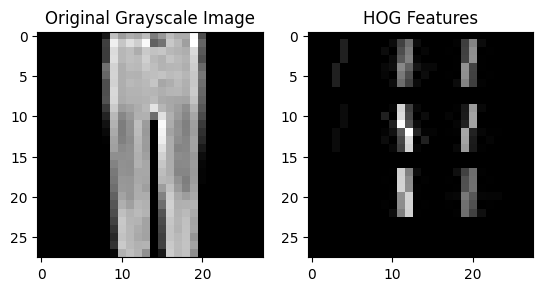

In [22]:
from skimage import feature
import matplotlib.pyplot as plt

# Assuming X_test[0] is a grayscale image
gray_image = X_test[1]

# Calculate HOG features
hog_features, hog_image = feature.hog(gray_image, visualize=True)

# Display the original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')

# Display the HOG features
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Features')
plt.show()

In [23]:
x_test=np.array(test_features)
x_train=np.array(train_features)

In [24]:

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9519047619047619


In [26]:
print(classification_report(y_test,y_pred))
print('####_Confusion Matrix_####')
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1433
           1       0.98      0.98      0.98      1410
           2       0.92      0.95      0.94      1357

    accuracy                           0.95      4200
   macro avg       0.95      0.95      0.95      4200
weighted avg       0.95      0.95      0.95      4200

####_Confusion Matrix_####


array([[1319,   24,   90],
       [   8, 1386,   16],
       [  59,    5, 1293]], dtype=int64)

In [9]:
# m*n --> m--> number of images of x_test, n-->number of classes which are predicted.
y_prob = model.predict_proba(x_test)
y_prob.argmax(axis=1)

array([2, 1, 0, ..., 1, 1, 0], dtype=int64)

In [10]:
roc_auc_scores = []
for i in range(model.classes_.shape[0]):
    roc_auc_i = roc_auc_score((y_test == i).astype(int), y_prob[:, i])
    roc_auc_scores.append(roc_auc_i)
    
np.mean(roc_auc_scores)

0.992175276779275

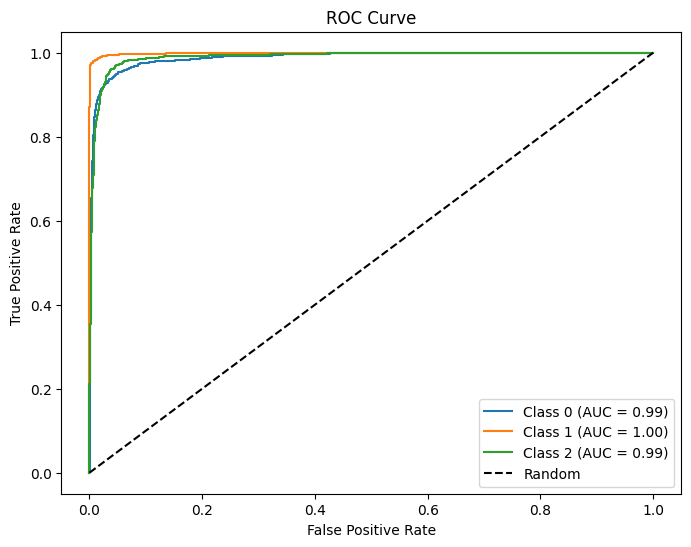

In [11]:
fpr = dict()
tpr = dict()
roc_auc = dict()
from sklearn.metrics import roc_curve, auc

for i in range(model.classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(model.classes_.shape[0]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Kmeans

In [12]:
from sklearn.cluster import KMeans

In [13]:
#  the number of clusters must be 3 according to the selected number of classes.
kmeans = KMeans(n_clusters=3, random_state=41)

kmeans.fit(x_train)

# Assign labels to clusters
cluster_labels = kmeans.predict(x_test)
cluster_labels

c:\Users\engah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 0, ..., 1, 1, 0])

In [14]:
print('####_Confusion Matrix_####')
confusion_matrix(cluster_labels,y_test)

####_Confusion Matrix_####


array([[1182,    8,  181],
       [  48, 1340,    3],
       [ 203,   62, 1173]], dtype=int64)

In [15]:
print('The Kmeans accuracy: {}'.format((accuracy_score(y_test, cluster_labels)*100).round(2)),end='\n\n\n')


The LogisticRegression accuracy: 87.98


              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1433
           1       0.98      0.98      0.98      1410
           2       0.92      0.95      0.94      1357

    accuracy                           0.95      4200
   macro avg       0.95      0.95      0.95      4200
weighted avg       0.95      0.95      0.95      4200



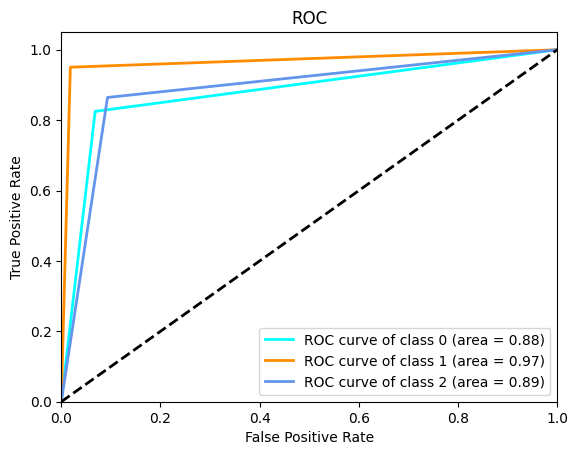

The ROC AUC score is 0.91.


In [16]:


y_bin = label_binarize(y_test, classes=[0, 1, 2])

# Get the predicted labels
y_pred = kmeans.predict(x_test)

# Binarize the predicted labels
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Compute the ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()
roc_auc = roc_auc_score(y_bin, y_pred_bin, multi_class='ovo')

# Print the ROC AUC score
print(f'The ROC AUC score is {roc_auc:.2f}.')

In [17]:
y_pred_bin,y_prob

(array([[1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        ...,
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0]]),
 array([[4.79560380e-01, 1.81943261e-03, 5.18620187e-01],
        [4.56866510e-03, 9.95421415e-01, 9.91963116e-06],
        [7.72475442e-01, 7.02212362e-05, 2.27454336e-01],
        ...,
        [2.81973722e-03, 9.97175467e-01, 4.79617205e-06],
        [1.37346839e-02, 9.86237978e-01, 2.73378491e-05],
        [5.31411653e-01, 1.99556873e-04, 4.68388790e-01]]))

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1433
           1       0.96      0.95      0.96      1410
           2       0.82      0.86      0.84      1357

    accuracy                           0.88      4200
   macro avg       0.88      0.88      0.88      4200
weighted avg       0.88      0.88      0.88      4200

